**Group Details:**

- Name:יוסף  ID:315111658
- Name:זהבה ID:327336483
- Name:מאיה ID:206991390

In [2]:
#@title Helper Functions and Imports

from pydrive2.auth import GoogleAuth
from google.colab import drive
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.stats import pearsonr, spearmanr

# Some visual settings
sns.set()
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.labelsize'] = 14

RENT_ID = '1R6v2uHpFyNb1z2DT0M_JHTUE3PHFFYmu'
SOCIORANK_ID = '1gc57mT5zgIb-XeVsMfCphnWTRz1-dmLj'

def load_df(drive_id, **load_kwargs):
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)
  download = drive.CreateFile({'id': drive_id})
  filename = '{}.csv'.format(drive_id)
  download.GetContentFile(filename)
  return pd.read_csv(filename, **load_kwargs)

# Introduction to Data Science - Lab \#2

## Exploratory Data Analysis

### Case Study: Rental Listings in Jerusalem
In this lab we will practice our exploratory data analysis skills using real data!

We will explore data of rental pricings in Jersualem.
The dataset consists of listings published in https://www.komo.co.il/ during the summer of 2022.

We will use two python packages for visualizing the data: `matplotlib` (and specifically its submodule `pyplot` imported here as `plt`) and `seaborn` (imported as `sns`). Seaborn is a package that "wraps" matplotlib and introduces more convenient functions for quickly creating standard visualizations based on dataframes.

Please **breifly** go over this [quick start guide](https://matplotlib.org/stable/tutorials/introductory/quick_start.html) to matplotlib, the [first](https://seaborn.pydata.org/tutorial/introduction.html) seaborn introduction page until the "Multivariate views on complex datasets" section (not included), and the [second](https://seaborn.pydata.org/tutorial/function_overview.html) introduction page until the "Combining multiple views on the data" section.



In [3]:
#@title Loading the dataset
rent_df = load_df(RENT_ID)
rent_df = rent_df.drop_duplicates().reset_index(drop=True)
rent_df_backup_for_exercise = rent_df.copy()
clean_df_area_filtered = None
clean_df = None

Let's print a random sample:

In [4]:
np.random.seed(2)
rent_df.sample(5)

,propertyID,neighborhood,monthlyRate,mefarsem,rooms,floor,area,entry,description,numFloors,lastUpdate,dateCollected
108,3978433,גבעת משואה,3700.0,private,2.0,0.0,NaN,NaN,דירת 2 חדרים יפייפיה בגבעת משואה (קרובה לעין כ...,1.0,0.9167,10/08/2022
419,3980407,פסגת זאב,4650.0,private,4.0,2.0,90.0,10/08/2022,דירת ארבעה חדרים ברחוב השישה עשר 49 פינת חיל ה...,4.0,13.0000,10/08/2022
456,3979901,בית הכרם,7300.0,private,4.0,1.0,NaN,NaN,"ללא תיווך. דירת 4 חדרים בבית הכרם הישנה, משופצ...",2.0,1.0000,10/08/2022
347,3993441,מחנה יהודה,5500.0,private,3.0,0.0,NaN,NaN,דירה מרווחת עם שני חדרים גדולים במיוחד וחדר נו...,4.0,2.0000,10/08/2022
307,3994090,רחביה,5000.0,private,3.0,0.0,NaN,NaN,"להשכרה, דירה, בירושלים. רחוב שקט בלב רחביה, קר...",4.0,0.9167,10/08/2022


And print some summary statistics:

In [5]:
rent_df.describe(include='all')

,propertyID,neighborhood,monthlyRate,mefarsem,rooms,floor,area,entry,description,numFloors,lastUpdate,dateCollected
count,6.160000e+02,616,616.000000,616,616.000000,615.000000,297.000000,294,600,614.000000,616.000000,616
unique,NaN,54,NaN,2,NaN,NaN,NaN,17,578,NaN,NaN,1
top,NaN,קריית יובל,NaN,private,NaN,NaN,NaN,10/08/2022,"להשכרה, דירה, קומה ראשונה, בירושלים",NaN,NaN,10/08/2022
freq,NaN,66,NaN,603,NaN,NaN,NaN,260,8,NaN,NaN,616
mean,3.981614e+06,NaN,4730.105519,NaN,2.935877,1.925203,87.750842,NaN,NaN,3.907166,5.969821,NaN
std,6.504583e+04,NaN,2195.935720,NaN,1.010286,1.579881,276.071754,NaN,NaN,1.972779,7.309088,NaN
min,2.494041e+06,NaN,0.000000,NaN,1.000000,-2.000000,1.000000,NaN,NaN,1.000000,0.010400,NaN
25%,3.981694e+06,NaN,3500.000000,NaN,2.000000,1.000000,42.000000,NaN,NaN,3.000000,0.916700,NaN
50%,3.987901e+06,NaN,4400.000000,NaN,3.000000,2.000000,60.000000,NaN,NaN,4.000000,2.000000,NaN
75%,3.992605e+06,NaN,5800.000000,NaN,3.500000,3.000000,85.000000,NaN,NaN,4.000000,8.000000,NaN


The variables we will focus on are:
1. neighborhood: The hebrew name of the neighborhood in jerusalem where the listing is located
2. monthlyRate: The monthly rate (שכר דירה) in shekels
3. rooms: The number of rooms in the apartment
4. floor: The floor in which the apartment is located
5. area: The area of the apartment in squared meters
6. numFloors: The total number of floors in the building

**What is the distribution of prices in this dataset?**

Q: Plot a histogram with 30 bins of the monthly rates in this dataset:

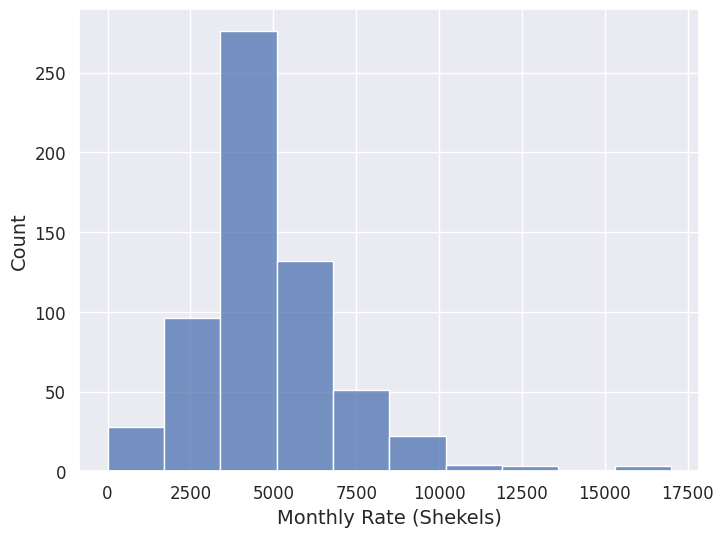

In [6]:
plt.figure(figsize=(8,6))
sns.histplot(rent_df['monthlyRate'], bins=10)
plt.xlabel("Monthly Rate (Shekels)");

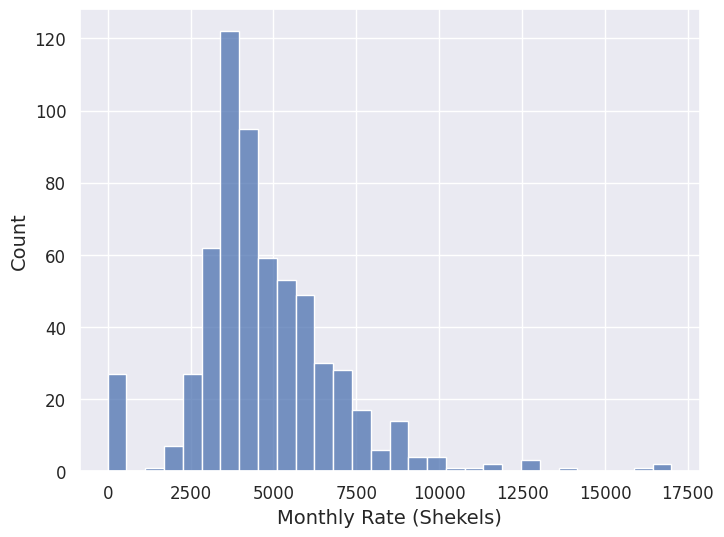

In [7]:
# @title Solution 1
plt.figure(figsize=(8,6))
sns.histplot(rent_df['monthlyRate'], bins=30)
plt.xlabel("Monthly Rate (Shekels)");

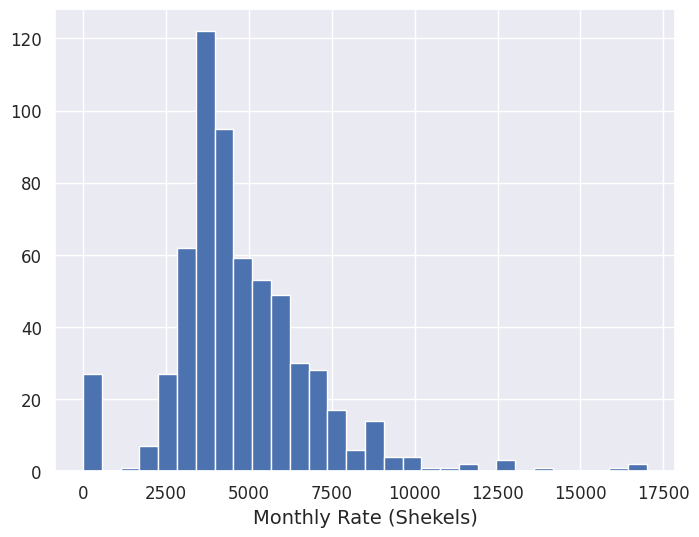

In [8]:
# @title Solution 2
rent_df["monthlyRate"].hist(bins=30, figsize=(8,6))
plt.xlabel("Monthly Rate (Shekels)");


<br><br><br><br><br><br><br>
We see that the prices distribution peaks around ~3500 Shekels and that it is right skewed, as there are some very expensive apartments.
We can also see a peak at zero which makes sense as sometimes listings do not include a price. We would want to filter those out when we analyze prices later on.

Q: Print the number of listings that have no monthly rate:


In [9]:
# @title Solution
print("Number of apartments without a price: ", rent_df['monthlyRate'].value_counts()[0].round(3))
#outlier_df = rent_df[rent_df['monthlyRate'] <= 0].reset_index(drop=True)
#outlier_df.head()
#now to get only the neighborhood columns
#outl_df=rent_df['neighborhood'][rent_df['monthlyRate'] <= 0]
#outl_df.head()


Number of apartments without a price:  25


We want to remove those listings, but we don't want ot lose the data, as we might want to know how many and what type of outliers we originally removed.

In [10]:
outlier_df = pd.DataFrame(columns=rent_df.columns.to_list()+['reason']) # will save the outliers

outlier_df = rent_df[rent_df['monthlyRate'] <= 0].reset_index(drop=True)
outlier_df['reason']= "monthlyRate <= 0"

outlier_df = outlier_df.drop_duplicates().reset_index(drop=True) # in case we have duplicate rows
outlier_df.tail()


,propertyID,neighborhood,monthlyRate,mefarsem,rooms,floor,area,entry,description,numFloors,lastUpdate,dateCollected,reason
20,3983978,קריית משה,0.0,private,4.0,3.0,100.0,10/08/2022,דירת 4 חדרים - במצב מצויין - שמורה ביותר כולל ...,5.0,21.0,10/08/2022,monthlyRate <= 0
21,3985184,נווה יעקב,0.0,private,4.0,1.0,68.0,10/08/2022,"דירה במצב שמור מאד. ממוזגת, 2 חדרי שירותים (אח...",2.0,17.0,10/08/2022,monthlyRate <= 0
22,3952750,מוסררה,0.0,private,5.5,1.0,180.0,10/08/2022,"להשכרה דירה מפוארת, במרכז העיר מרחק הליכה מהע...",4.0,4.0,10/08/2022,monthlyRate <= 0
23,3988157,גבעת שאול,0.0,private,5.0,1.0,140.0,10/08/2022,בית פרטי שתי קומות שימש בעבר לגן מתאים כל מתרה...,2.0,14.0,10/08/2022,monthlyRate <= 0
24,3981160,גבעת משואה,0.0,private,6.0,-2.0,NaN,NaN,"מול נוף עוצר נשימה, 6 חדרים מרווחים, מרפסת 70 ...",5.0,27.0,10/08/2022,monthlyRate <= 0


We will now remove those listings and save the result to a new variable `clean_df`:

In [11]:
clean_df = rent_df[rent_df['monthlyRate'] > 0].reset_index(drop=True)

**What is the distribution of the number of rooms?**

Q: Use `sns.countplot` to compare the counts of listings with different numbers of rooms. Plot all bars in the same [color](https://matplotlib.org/stable/tutorials/colors/colors.html) of your choice.


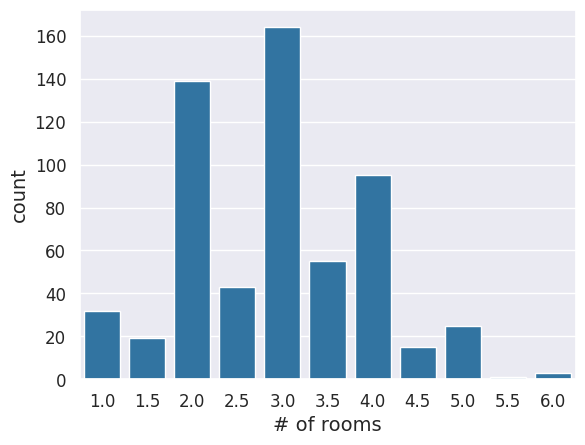

In [12]:
# @title Solution
if clean_df is None:
  print("Can't run until 'clean_df' is created!")
else:
  sns.countplot(x='rooms', data=clean_df, color='tab:blue')
  plt.xlabel("# of rooms");

The distribution peaks at three rooms and we also see that "half rooms" are less common.

**Can we see an association between apartment area and price?**

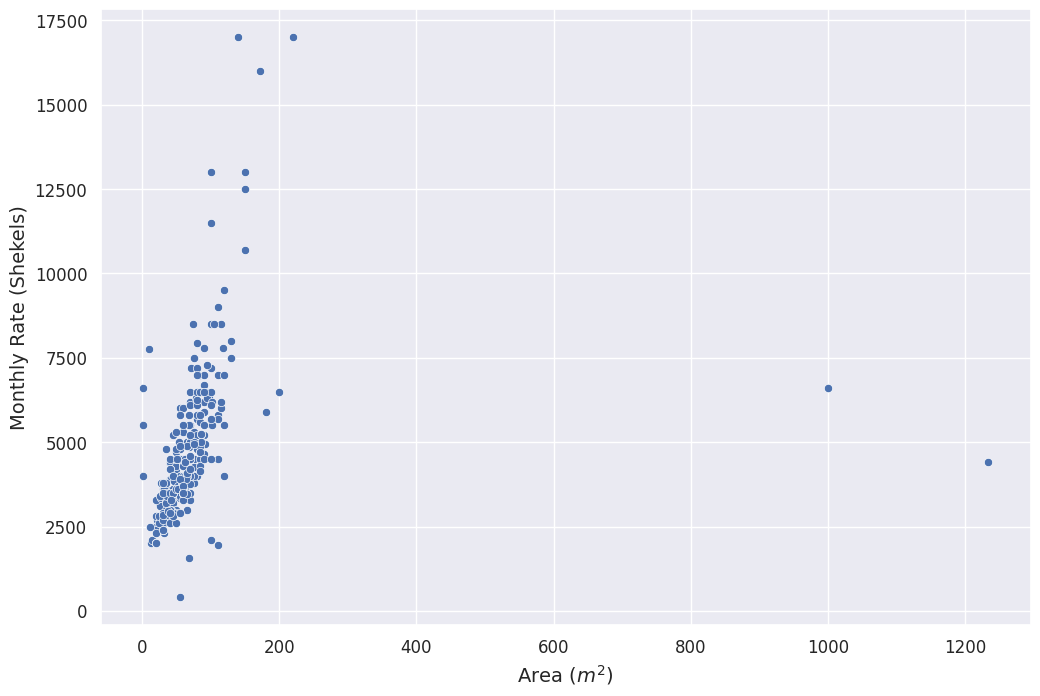

In [13]:
if clean_df is None:
  print("Can't run until 'clean_df' is created!")
else:
  plt.figure(figsize=(12,8))
  sns.scatterplot(x='area', y='monthlyRate', data=clean_df)
  plt.ylabel("Monthly Rate (Shekels)")
  plt.xlabel("Area ($m^2$)");

We see clear outliers here! We know that area is measured in squared meters and it is unlikely that there are any apartments of ~1000$m^2$.

Let's look at those samples to see if we can understand what happend there:

In [14]:
if clean_df is None:
  print("Can't run until 'clean_df' is created!")
else:
  display(clean_df.sort_values('area', ascending=False).head(4))

,propertyID,neighborhood,monthlyRate,mefarsem,rooms,floor,area,entry,description,numFloors,lastUpdate,dateCollected
185,3964340,תלפיות,4400.0,private,2.0,2.0,1234.0,10/08/2022,NaN,3.0,26.0000,10/08/2022
544,3956561,זכרון משה,6600.0,private,3.5,3.0,1000.0,01/07/2022,דירה מהממת בלב ירושלים. צמודה לרכבת הקלה- תחנת...,3.0,28.0000,10/08/2022
580,3974914,תלפיות,17000.0,private,5.0,3.0,220.0,10/08/2022,"דירת 5 חדרים ענקית ומהממת, בבנין בוטיק ויחודי ...",4.0,6.0000,10/08/2022
570,3988577,פסגת זאב,6500.0,private,5.5,1.0,200.0,10/08/2022,"דירה בת 5.5 חדרים . בקומה התחתונה סלון , מטבח ...",3.0,0.9583,10/08/2022


And inspect the description of one of those listings:

In [15]:
if clean_df is None:
  print("Can't run until 'clean_df' is created!")
else:
  display(clean_df.at[544,'description'])

'דירה מהממת בלב ירושלים. צמודה לרכבת הקלה- תחנת הדוידקה. 3 חדרים ענקיים ולכל חדר מרפסת גדולה. חלל כניסה עם פינת ישיבה. מתאימה מאוד ל- 3 שותפים'

Clearly not a 1000 m^2 apartment...

Q: Save a new dataframe named `clean_df_area_filtered` with all listings with area smaller than 800 m^2. Again, add the removed outliers to the outliers_df dataframe.

Plot again the scatter of area vs. monthly rate after removing the outliers.

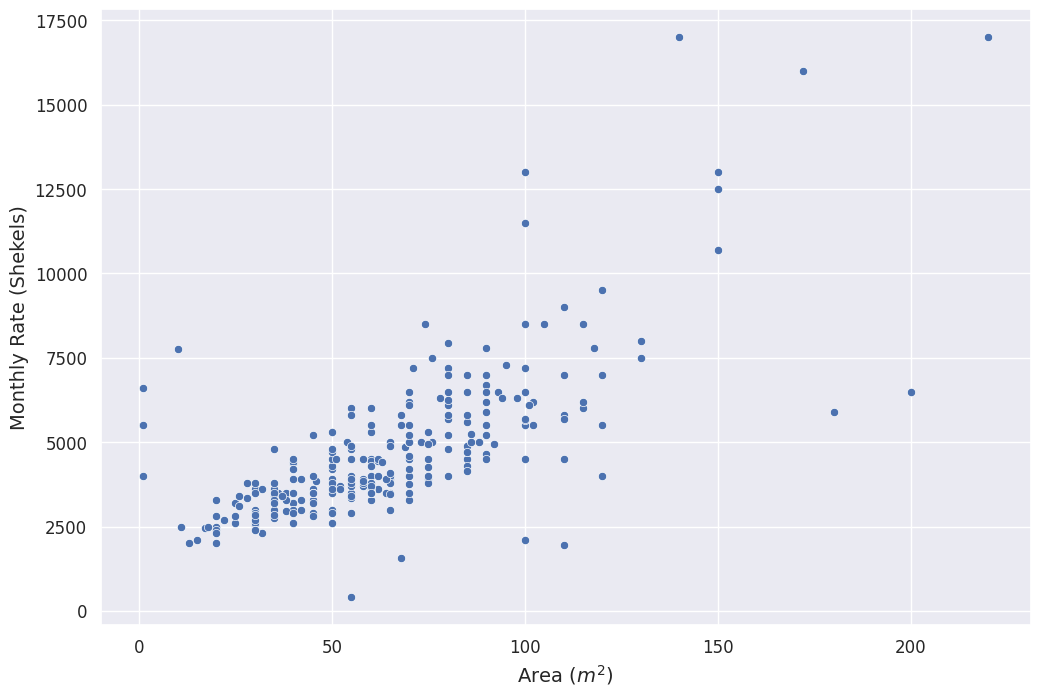

In [16]:
# @title Solution
if clean_df is None:
  print("Can't run until 'clean_df' is created!")
elif outlier_df is None:
  print("Can't run until 'outlier_df' is created!")
else:
  # save outliers
  outliers = clean_df[clean_df['area'] >= 800].reset_index(drop=True)
  outliers['reason']= "'area' >= 800"
  outlier_df = pd.concat([outlier_df, outliers], axis=0, ignore_index=True).drop_duplicates().reset_index(drop=True)

  # remove them
  clean_df_area_filtered = clean_df[clean_df['area'] < 800].reset_index(drop=True)
  plt.figure(figsize=(12,8))
  sns.scatterplot(x='area', y='monthlyRate', data=clean_df_area_filtered)
  plt.xlabel("Area ($m^2$)")
  plt.ylabel("Monthly Rate (Shekels)");

Again, we see some strange behavior of apartments with almost zero area but with a high monthly rate. Let's check them out:

In [17]:
# Show all apartments with area between 0 and 25
clean_df_area_filtered[clean_df_area_filtered['area'].between(0,25)]

,propertyID,neighborhood,monthlyRate,mefarsem,rooms,floor,area,entry,description,numFloors,lastUpdate,dateCollected
0,3994505,קריית יובל,2000.0,private,1.0,2.0,13.0,10/08/2022,"יחידת דיור להשכרה ברחוב הראשי של קריית יובל, ה...",2.0,0.8333,10/08/2022
1,3981298,רחביה,2450.0,private,1.0,1.0,17.0,10/08/2022,דירת יחיד 17 מטר כולל מרפסת קטנה,3.0,0.9167,10/08/2022
3,3993997,בית וגן,2100.0,private,1.0,0.0,15.0,10/08/2022,"דירת חדר, כ-15 מ""ר, במיקום מרכזי אך שקט, משופצ...",3.0,1.0000,10/08/2022
5,3993552,הר נוף,2000.0,private,1.0,0.0,20.0,10/08/2022,"יחידה משופצת ליחיד או למשרד , מיקום מצוין",4.0,1.0000,10/08/2022
6,3972039,גבעת שאול,2700.0,private,1.0,0.0,22.0,10/08/2022,"דירת חדר כחדשה , כניסה נפרדת ללא וועד בית , מו...",1.0,8.0000,10/08/2022
7,3988096,המושבה הגרמנית,2500.0,private,1.0,0.0,18.0,10/08/2022,רלוונטי לנשים בלבד. ללא עישון. ללא חיות מחמד. ...,1.0,2.0000,10/08/2022
8,3992809,נחלאות,3200.0,private,1.0,2.0,25.0,10/08/2022,"הדירה המגניבה בנחלאות, מתפנה אחרי תקופה ארוכה ...",2.0,2.0000,10/08/2022
10,3983516,הגבעה הצרפתית,2000.0,private,1.0,2.0,20.0,10/08/2022,"דירת חדר קטנה, מסוגננת ונחמדה, מתאימה ליחיד בל...",13.0,2.0000,10/08/2022
12,3987706,נחלאות,2800.0,private,1.0,0.0,20.0,10/08/2022,"להשכרה, דירה, בירושלים ברחוב חצור בנחלאות. דיר...",2.0,8.0000,10/08/2022
13,3991842,קטמון הישנה,2500.0,private,1.0,1.0,20.0,10/08/2022,דירת חדר ליחיד באזור יפייפה ושקט בקטמון הישנה....,4.0,6.0000,10/08/2022


In [18]:
# Show all apartments with area between 0 and 25 that also have a price between 5000 and 10000
if clean_df_area_filtered is None:
  print("Can't run until 'clean_df_area_filtered' is created!")
else:
  display(clean_df_area_filtered[clean_df_area_filtered['area'].between(0,25) & clean_df_area_filtered['monthlyRate'].between(5000, 10000)])

,propertyID,neighborhood,monthlyRate,mefarsem,rooms,floor,area,entry,description,numFloors,lastUpdate,dateCollected
197,3984483,ארנונה,6600.0,private,4.0,2.0,1.0,01/09/2022,"בשכונת ארנונה, רח’ שלום יהודה, דירת 4 חדרים מש...",4.0,1.0,10/08/2022
235,3985019,פסגת זאב,5500.0,private,4.0,3.0,1.0,10/08/2022,להשכרה 4 חדרים מרווחת עם מרפסת סוכה שטופת שמש ...,4.0,2.0,10/08/2022
236,3944204,בית הכרם,7750.0,private,4.0,3.0,10.0,01/09/2022,"בבניין חדש, מושקעת, מוארת, מאווררת רח’ שקט, רח...",5.0,3.0,10/08/2022
276,3982178,נווה יעקב,5500.0,private,5.0,1.0,1.0,10/08/2022,"דירה במצב מעולה!! נוף, מוארת, מאווררת, מרפסת סוכה",4.0,23.0,10/08/2022


Those are clearly wrong too...
Besides that the relationship between the area and the price seems linear.



In [19]:
#remove the outliers
if clean_df_area_filtered is None:
  print("Can't run until 'clean_df_area_filtered' is created!")
elif outlier_df is None:
  print("Can't run until 'outlier_df' is created!")
else:
  non_ouliers = clean_df_area_filtered['area'] > 10 # get non outliers series of true/false

  # save outliers
  outliers = clean_df_area_filtered[~non_ouliers].reset_index(drop=True) # get the outliers
  outliers['reason']= "'area' <= 10"
  outlier_df = pd.concat([outlier_df, outliers], axis=0, ignore_index=True).drop_duplicates().reset_index(drop=True)

  # remove them
  clean_df_area_filtered = clean_df_area_filtered[non_ouliers].reset_index(drop=True)

#### **Can we see a different pattern for top floor apartments?**
Q: Plot again a scatter of area vs. monthly rate. This time distinguish (by color / marker style or both) between apartments that are in the top floor and the rest of the apartments. (You can create a new column in `clean_df_area_filtered` in the process)


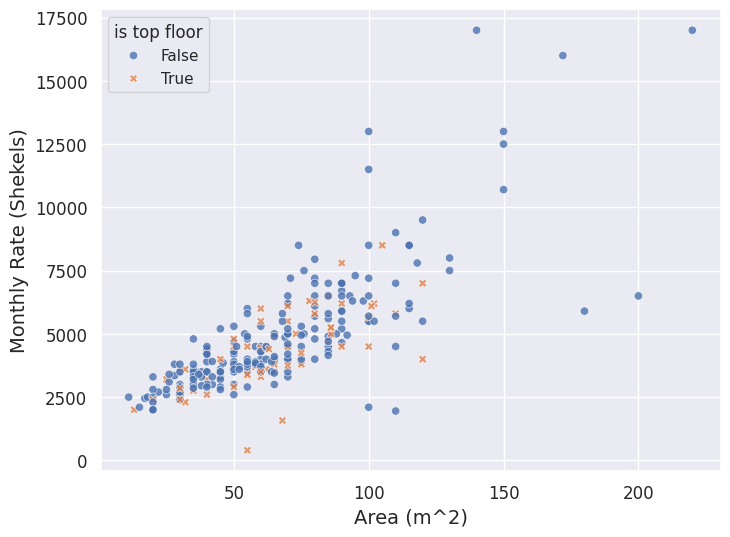

In [20]:
# @title Solution

if clean_df_area_filtered is None:
  print("Can't run until 'clean_df_area_filtered' is created!")
else:
  clean_df_area_filtered['is top floor'] = clean_df_area_filtered['floor'] == clean_df_area_filtered['numFloors']
  plt.figure(figsize=(8,6))
  sns.scatterplot(x='area', y='monthlyRate', data=clean_df_area_filtered, alpha=0.8, hue='is top floor', style="is top floor");
  plt.xlabel("Area (m^2)")
  plt.ylabel("Monthly Rate (Shekels)");

We can take a deeper look on the apartments with the very high monthly rate (to see if those are outliers or not):

In [21]:
if clean_df_area_filtered is None:
  print("Can't run until 'clean_df_area_filtered' is created!")
else:
  display(clean_df_area_filtered[clean_df_area_filtered['monthlyRate'] > 11000])

,propertyID,neighborhood,monthlyRate,mefarsem,rooms,floor,area,entry,description,numFloors,lastUpdate,dateCollected,is top floor
198,3956418,רחביה,13000.0,agent,4.0,1.0,100.0,NaN,Beautifully renovated furnished authentic arab...,3.0,0.0417,10/08/2022,False
237,3985051,טלביה,17000.0,private,4.0,4.0,140.0,10/08/2022,בקינג דיוד רזדנס דירת 4 חדרים להשכרה ללא תיו...,10.0,5.0000,10/08/2022,False
259,3982363,רחביה,16000.0,private,5.0,2.0,172.0,10/08/2022,"הזדמנות נדירה!!! ברחוב רד""ק, בנקודה הכי קרובה ...",5.0,0.9583,10/08/2022,False
262,3980016,אבו תור,12500.0,private,5.0,0.0,150.0,10/08/2022,"דירת דופלקס ענקית 150 מ""ר עם כניסה נפרדת. הדיר...",4.0,27.0000,10/08/2022,False
265,3994228,בית ישראל,11500.0,private,5.0,1.0,100.0,10/08/2022,"דירה ממוקמת בלב ירושלים שכונת בית ישראל, מרפסת...",3.0,2.0000,10/08/2022,False
268,3974914,תלפיות,17000.0,private,5.0,3.0,220.0,10/08/2022,"דירת 5 חדרים ענקית ומהממת, בבנין בוטיק ויחודי ...",4.0,6.0000,10/08/2022,False
272,3981999,תלפיות,13000.0,private,5.0,4.0,150.0,10/08/2022,דירת 5 חדרים חדשה! בדירה יש מרפסת מרפסת שירו...,5.0,24.0000,10/08/2022,False


We can see some representation of the more expensive neighborhoods of Jerusalem here.. More on the neighborhoods later on!

**Is there also a relation between the number of rooms and the listing price?**

Q: Create a visualization that compares the distribution of prices for different number of rooms. Your visualization should provide information about central tendency and some information about the distribution of individual values around it.

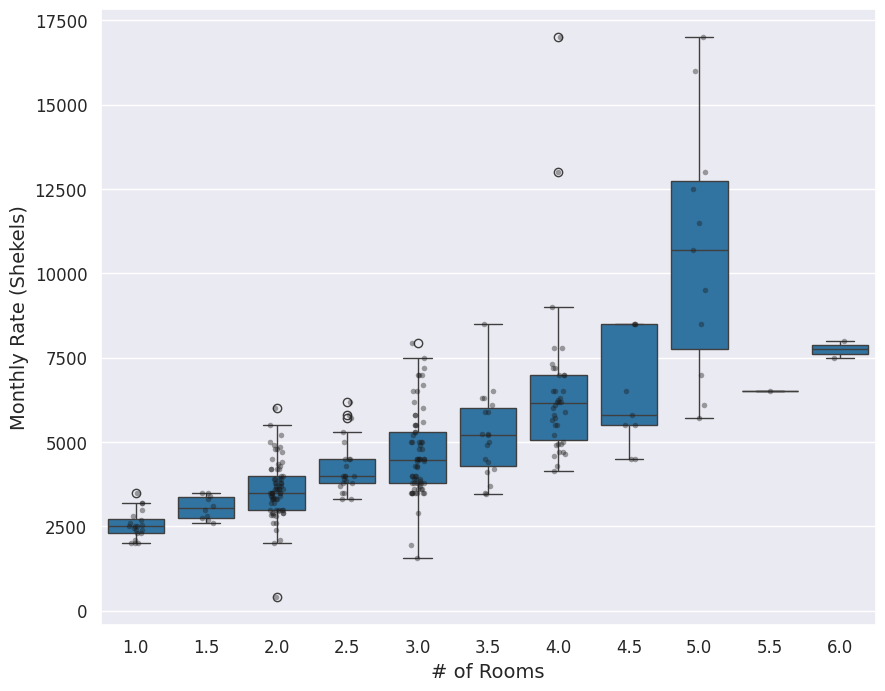

In [22]:
# @title Solution
if clean_df_area_filtered is None:
  print("Can't run until 'clean_df_area_filtered' is created!")
else:
  plt.figure(figsize=(10,8))
  sns.boxplot(x='rooms', y='monthlyRate', data=clean_df_area_filtered, color='tab:blue')
  sns.stripplot(x='rooms', y='monthlyRate', alpha=0.4 ,size=4,color='k',data=clean_df_area_filtered)
  plt.xlabel("# of Rooms")
  plt.ylabel("Monthly Rate (Shekels)");

  # Or:
  # plt.figure(figsize=(10,8))
  # sns.barplot(x='rooms', y='monthlyRate', data=clean_df_area_filtered, color='tab:blue', errorbar=None, estimator='median')
  # # Can also use mean but median is more informative in this case as prices are skewed...
  # sns.stripplot(x='rooms', y='monthlyRate', alpha=0.4 ,color='k',data=clean_df_area_filtered)
  # plt.xlabel("# of Rooms")
  # plt.ylabel("Monthly Rate (Shekels)");

  #Violin plot completly fails for very small subsets:
  # plt.figure(figsize=(10,8))
  # sns.violinplot(x='rooms', y='monthlyRate', data=clean_df_area_filtered, color='tab:blue')
  # plt.xlabel("# of Rooms")
  # plt.ylabel("Monthly Rate (Shekels)");


Now that we finished pre-processing the data, we can see the state of our outliers VS the data that remains:

In [23]:
if outlier_df is None:
  print("Can't run until 'outlier_df' is created!")
else:
  # describe the outlier data
  display(outlier_df.groupby('reason').describe())
  print(f"Proportion removed: {100*len(outlier_df) / (len(outlier_df)+len(clean_df_area_filtered)):.0f}")

propertyID                                                   \
                      count        mean           std        min         25%   
reason                                                                         
'area' <= 10            5.0  3976471.40  18104.071291  3944204.0  3982178.00   
'area' >= 800           2.0  3960450.50   5500.583651  3956561.0  3958505.75   
monthlyRate <= 0       25.0  3980984.84  23008.164119  3881150.0  3983978.00   

                                                   monthlyRate          ...  \
                        50%         75%        max       count    mean  ...   
reason                                                                  ...   
'area' <= 10      3984483.0  3985019.00  3986473.0         5.0  5870.0  ...   
'area' >= 800     3960450.5  3962395.25  3964340.0         2.0  5500.0  ...   
monthlyRate <= 0  3987824.0  3991225.00  3994795.0        25.0     0.0  ...   

                 numFloors       lastUpdate                                \
                       75%   max      count       mean        std     min   
reason                                                                      
'area' <= 10           4.0   5.0        5.0   9.200000  10.109402   1.000   
'area' >= 800          3.0   3.0        2.0  27.000000   1.414214  26.000   
monthlyRate <= 0       4.0  11.0       25.0   9.886668   9.285034   0.375   

                                          
                   25%   50%   75%   max  
reason                                    
'area' <= 10       2.0   3.0  17.0  23.0  
'area' >= 800     26.5  27.0  27.5  28.0  
monthlyRate <= 0   1.0   7.0  16.0  29.0  

[3 rows x 56 columns]

Proportion removed: 10


# Submission Exercises

## Part 1: Diving deeper into rental prices

In [24]:
# @title Part 1 - Create DataFrame
part1_df = rent_df_backup_for_exercise.copy()

Let's go back to the distribution of monthly rental prices in the dataset. Are there interesting trends in the distribution that we missed in the visualizations before?

**Use only `part1_df` for the coding questions in this part**



### **Question 1**
Plot 3 different histograms of the monthly prices with 20, 60 and 120 bins respectively, each in a different axes\figure.


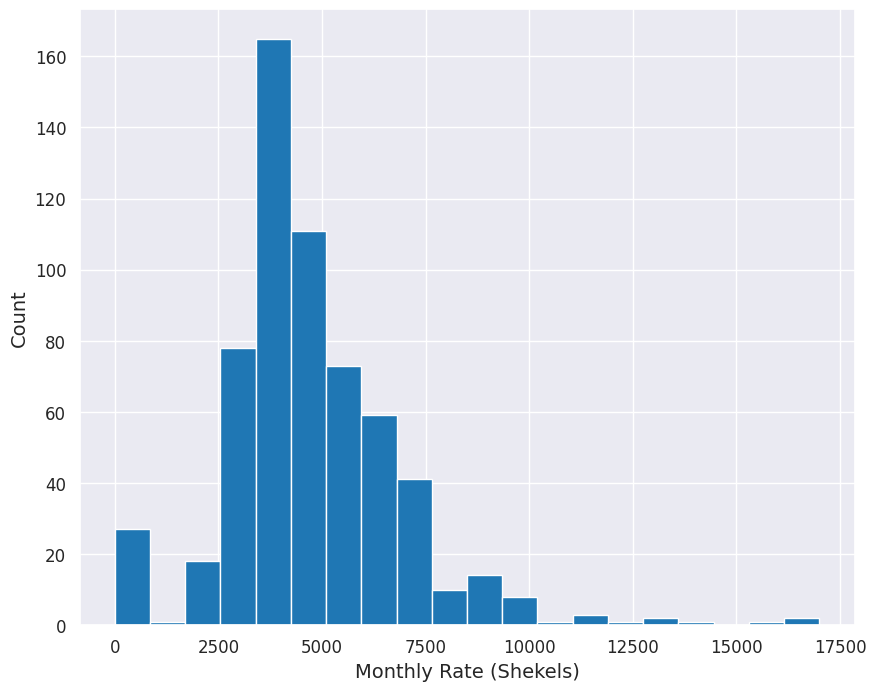

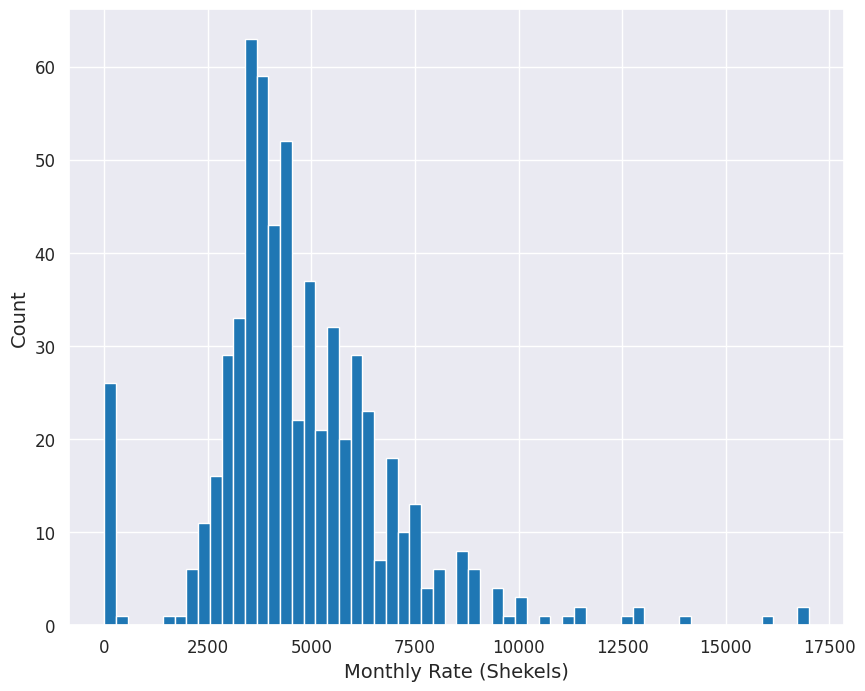

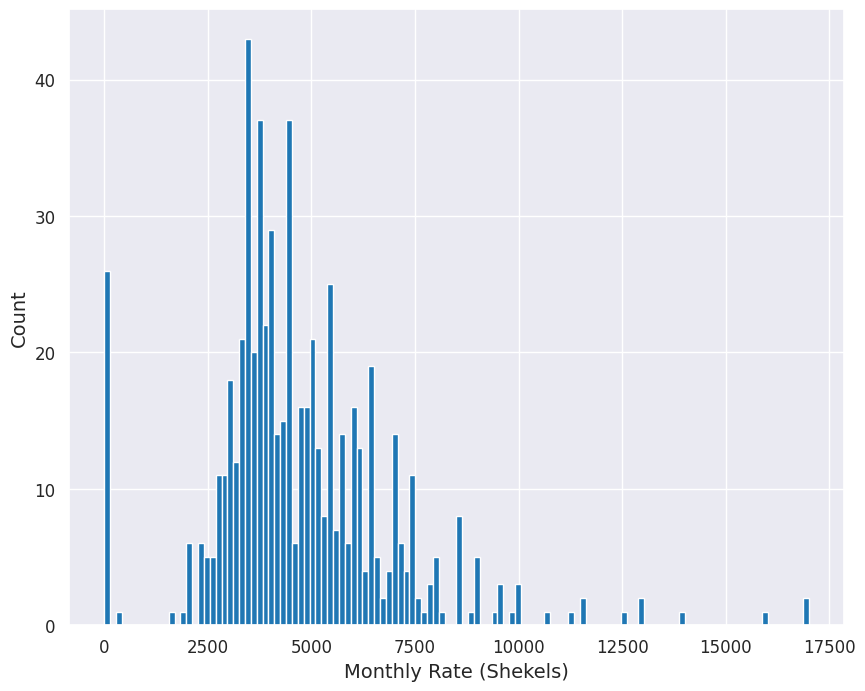

In [25]:
# Part 1 - Question 1
# Your code goes here:
#
#ploting 3 different histograms of the 'monthlyRate' column, with diffrent bin sizes
#graph 1
plt.figure(figsize=(10,8))
plt.hist(part1_df['monthlyRate'], bins=20, color='tab:blue')
plt.xlabel("Monthly Rate (Shekels)")
plt.ylabel("Count")
plt.show()
#graph 2
plt.figure(figsize=(10,8))
plt.hist(part1_df['monthlyRate'], bins=60, color='tab:blue')
plt.xlabel("Monthly Rate (Shekels)")
plt.ylabel("Count")
plt.show()
#graph 3
plt.figure(figsize=(10,8))
plt.hist(part1_df['monthlyRate'], bins=120, color='tab:blue')
plt.xlabel("Monthly Rate (Shekels)")
plt.ylabel("Count")
plt.show()




###**Question 2**
For 60 and 120 bins, you can see repeating pattern of "peaks" and "vallies" in the distribution (mostly in the range between 500 and 7000). Is this pattern due to people rounding the rental prices? Please create a visualization that answers this question. Describe in words how the graph shows what the answer is (Hint: you can use the '%' operator to compute the remainder of dividing values in a pandas Series by a scalar number).

In [26]:
# @title **extra hint**: please open this cell only after discussing with the course staff the best solution you could come up with

#
# Plot the distribution of values of the 'monthlyRate' column modulu (%) 1000
#

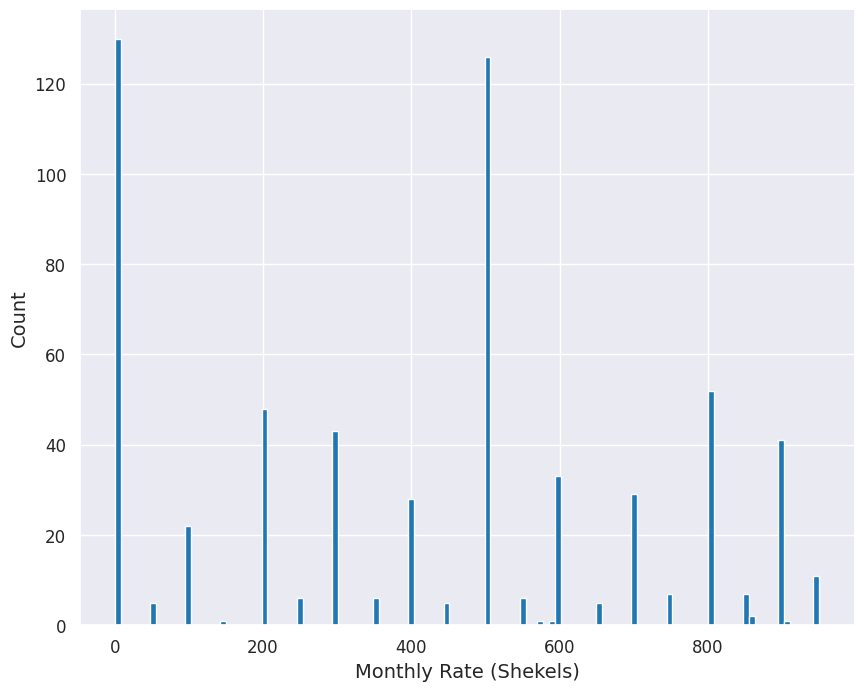

In [27]:
# Part 1 - Question 2
# Your code goes here:

#ploting the distribution of values of the 'monthlyRate' column modulu (%) 1000
plt.figure(figsize=(10,8))
plt.hist(part1_df['monthlyRate']%1000, bins=120, color='tab:blue')
plt.xlabel("Monthly Rate (Shekels)")
plt.ylabel("Count")
plt.show()
#



---
#### Part 1 Question 2 - textual Answer:
*Write your answer here:*
"People often round rental prices, typically avoiding hundreds and favoring increments of 500."

---

###**Question 3**
We expect to see a "drop" in prices frequency near the 5000 Shekels mark due to taxes considerations (See [here](https://www.kolzchut.org.il/he/%D7%A4%D7%98%D7%95%D7%A8_%D7%9E%D7%9E%D7%A1_%D7%A2%D7%9C_%D7%94%D7%9B%D7%A0%D7%A1%D7%94_%D7%9E%D7%94%D7%A9%D7%9B%D7%A8%D7%AA_%D7%93%D7%99%D7%A8%D7%94_%D7%9C%D7%9E%D7%92%D7%95%D7%A8%D7%99%D7%9D) for an explanation). Create a histogram visualization of the data with the smallest possible bins such that every bin will include exactly one multiplication of 500 (Hint: read the `bins` parameter documentation and what types it accepts). Explain why does this choice of bin size ensures that we will not see rounding effects. Do you see a "drop" around 5000 Shekels? Are there other "drops"?


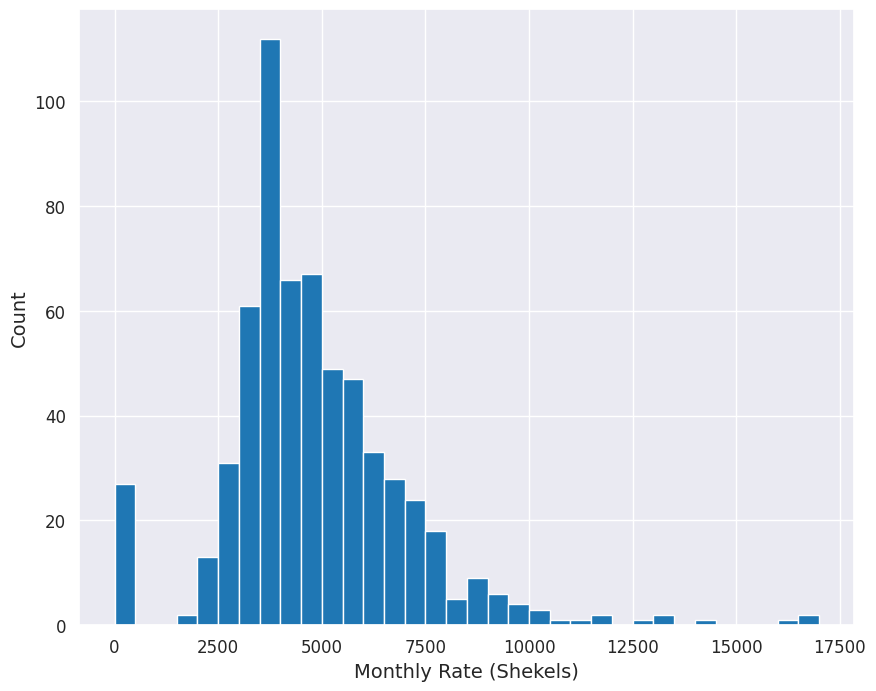

In [28]:
# Part 1 - Question 3
# Your code goes here:
#create a sequence from 0 to maximum value of the 'monthlyRate' column, in jumps of 500
bin_seq=np.arange(0,part1_df['monthlyRate'].max()+500,500)
#plot a histogram of values of the 'monthlyRate' when each bin includes one multiple of 500
plt.figure(figsize=(10,8))
plt.hist(part1_df['monthlyRate'], bins=bin_seq, color='tab:blue')
plt.xlabel("Monthly Rate (Shekels)")
plt.ylabel("Count")
plt.show()

#



---
#### Part 1 Question 3 - textual Answer:

we dont see rounding effects because it jumps in 500 increments,just like the rounding effects in the last question.
we do see a drop around 5000 shekels, but we also see a drop around 10000 shekels. also the drop that around 5000 stars a bit earlier.
we can also see a drop from 0 to the other values, but we can assume they are an outlier wuth defects in the data.
---

## Part 2: Size or number of rooms?

In [29]:
# @title Part 2 - Create DataFrame

# run cleaning from the intro part:
part2_df = rent_df_backup_for_exercise.copy()
part2_df = part2_df[part2_df['monthlyRate'] > 0].reset_index(drop=True);
part2_df = part2_df[part2_df['area'] < 800].reset_index(drop=True)
part2_df = part2_df[part2_df['area'] > 10].reset_index(drop=True)

We saw that both the number of rooms and the area of an apartment are strongly associated with the monthly rate. We now want to check if those are just two perspectives of the same relation (how big is the apartment) or is there something more to it. We will use the cleaned dataframe for this exercise.

**Use only `part2_df` for the coding questions in this part**


### **Question 1**
Generate a visualization to support the hypothesis that there is a strong association between the number of rooms and the area of the apartment. Explain your choice of plot type and your conclusion from the graph.


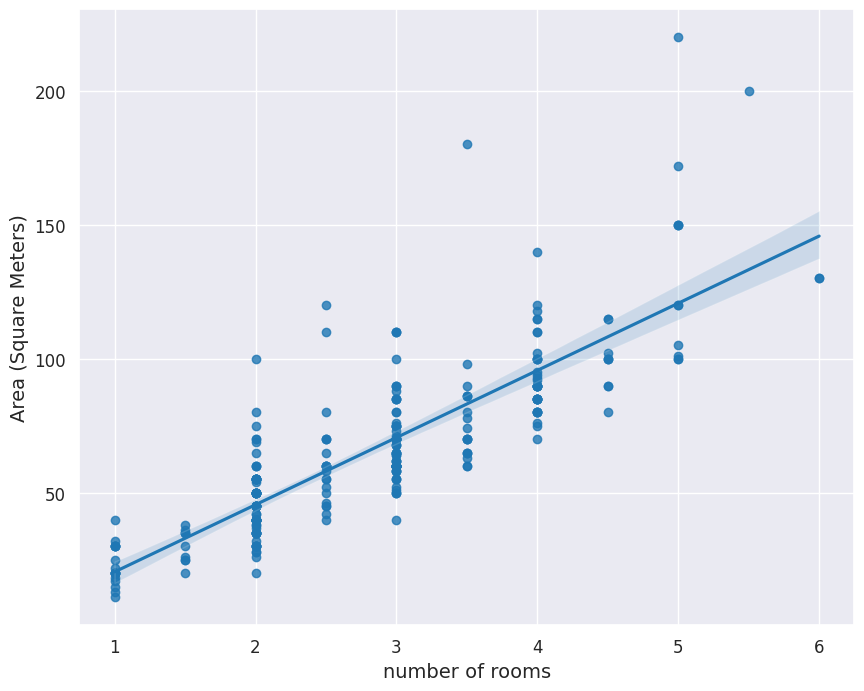

In [30]:
# Part 2 - Question 1
# Your code goes here:
##ploting a scatter plot of 'area' and 'rooms' with a regression line
plt.figure(figsize=(10,8))
sns.regplot(x='rooms', y='area', data=part2_df, color='tab:blue')
plt.xlabel("number of rooms")
plt.ylabel("Area (Square Meters)")
plt.show()
#



---
#### Part 2 Question 1 - textual Answer:
*Write your answer here:*
I used scatter plot to visualize the data. also i added a regression line to emphasize a correlation. we can see here that even though there is a varability in the data, the relationship between the x and y is positivly correlated.
---

### **Question 2**
Add a new column to the dataframe named `"averageRoomSize"` with the average room size in the given listing.


In [31]:
# Part 2 - Question 2
# Your code goes here:
#addinf a new column to the 'part2_df' dataframe names "averageRommSize" that includes the average room size
part2_df["averageRommSize"] = part2_df["area"] /part2_df["rooms"]
part2_df.head()
#



,propertyID,neighborhood,monthlyRate,mefarsem,rooms,floor,area,entry,description,numFloors,lastUpdate,dateCollected,averageRommSize
0,3994505,קריית יובל,2000.0,private,1.0,2.0,13.0,10/08/2022,"יחידת דיור להשכרה ברחוב הראשי של קריית יובל, ה...",2.0,0.8333,10/08/2022,13.0
1,3981298,רחביה,2450.0,private,1.0,1.0,17.0,10/08/2022,דירת יחיד 17 מטר כולל מרפסת קטנה,3.0,0.9167,10/08/2022,17.0
2,3981623,מלחה,2550.0,private,1.0,0.0,30.0,10/08/2022,"דירה יפה ומטופחת, לדיירת שקטה לטווח ארוך, ללא ...",2.0,0.9167,10/08/2022,30.0
3,3993997,בית וגן,2100.0,private,1.0,0.0,15.0,10/08/2022,"דירת חדר, כ-15 מ""ר, במיקום מרכזי אך שקט, משופצ...",3.0,1.0000,10/08/2022,15.0
4,3994399,פסגת זאב,2300.0,private,1.0,1.0,32.0,10/08/2022,"בס""ד בפסגת זאב מזרח דירת חדר גדולה משופצת ויפ...",1.0,0.8750,10/08/2022,32.0


###**Question 3**
Create a plot to inspect the relation between the average room size and the monthly rate.

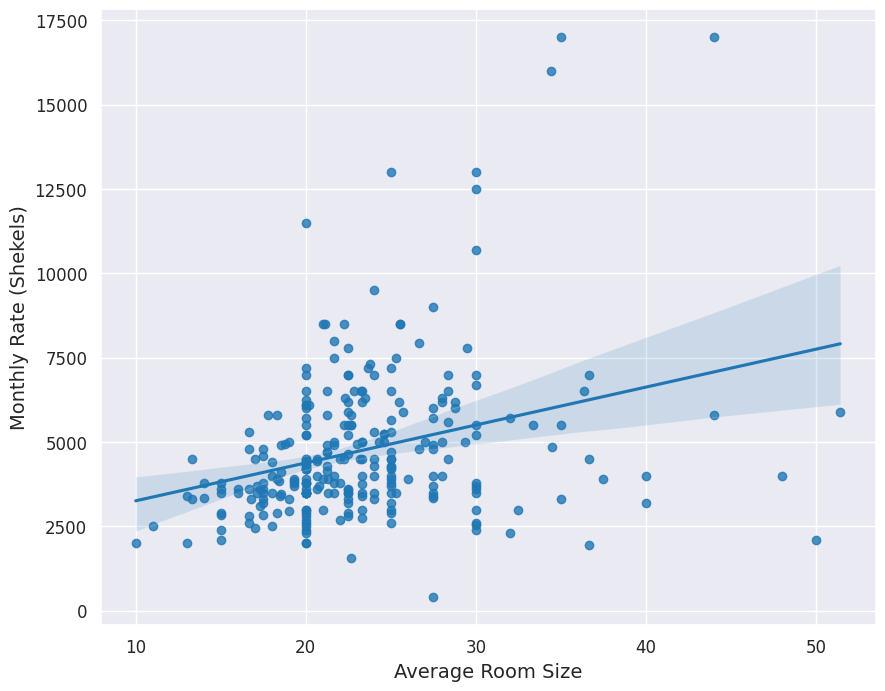

In [32]:
# Part 2 - Question 3
# Your code goes here:
#plot relation between average room size and monthly rate
plt.figure(figsize=(10,8))
sns.regplot(x='averageRommSize', y='monthlyRate', data=part2_df, color='tab:blue')
plt.xlabel("Average Room Size")
plt.ylabel("Monthly Rate (Shekels)")
plt.show()
#



### Question 4 - **bonus**
We can see that the variance of the monthly rate increases with the average room size.

Suggest what might be the reason for the increase in the variance and create a visualization to support or refute your suggestion.

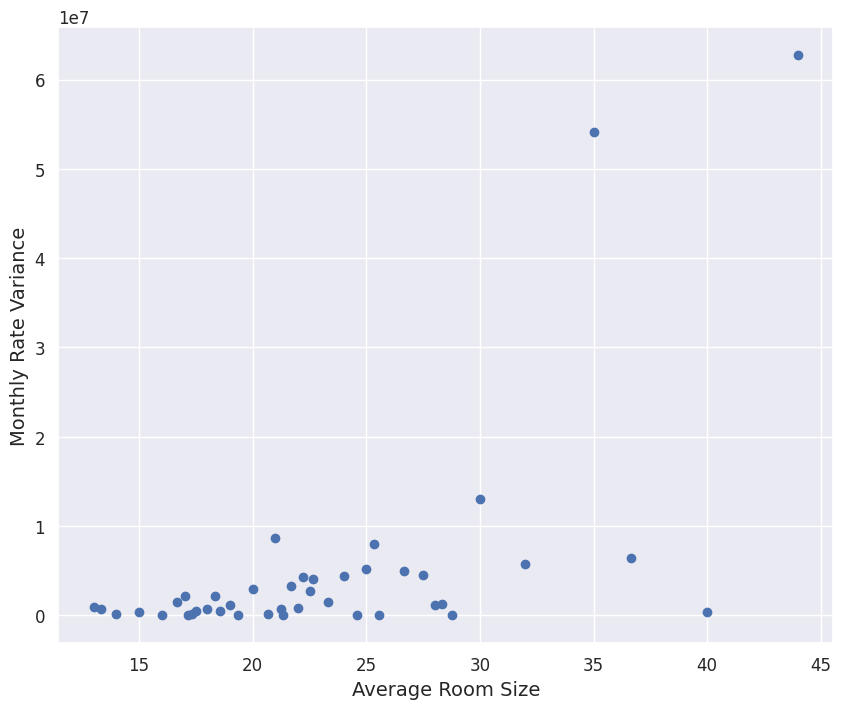

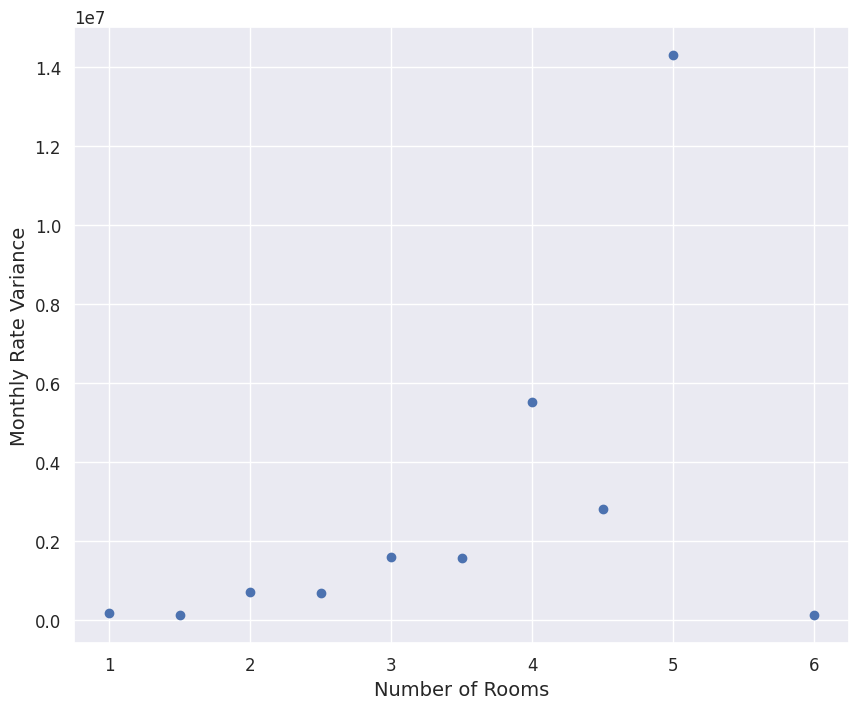

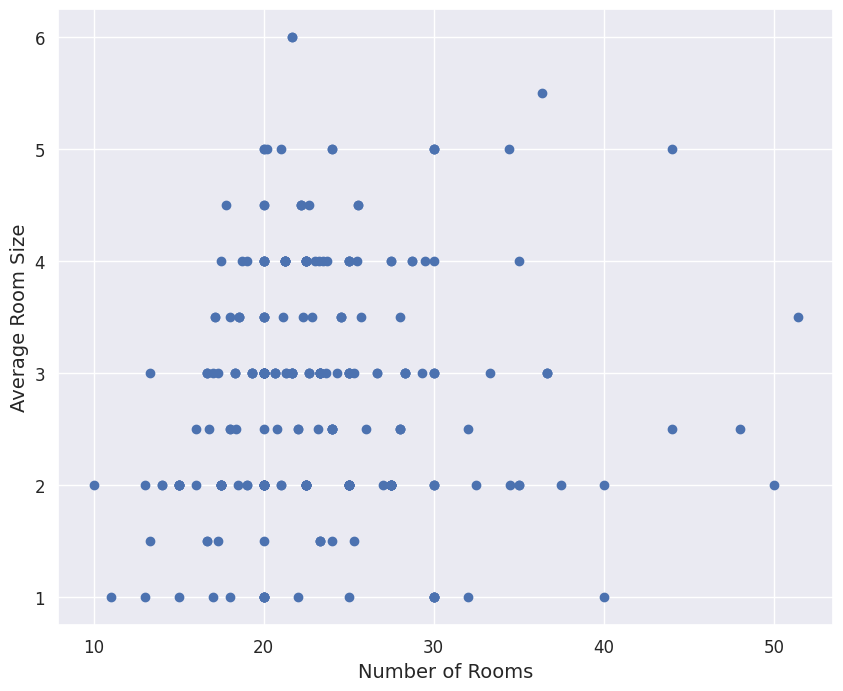

In [33]:
# Part 2 - Question 4
# Your code goes here:
#calculate var  of monthly rate for each average room size
df_var = part2_df['monthlyRate'].groupby(part2_df['averageRommSize']).var()
#create new dataframe from  'df_var'
df_var = pd.DataFrame(df_var)
#choose namees of columns
#plot based on df_var
plt.figure(figsize=(10,8))
plt.scatter(df_var.index, df_var['monthlyRate'])
plt.xlabel("Average Room Size")
plt.ylabel("Monthly Rate Variance")
plt.show()
#not plot based on number of rooms
df_var2= part2_df['monthlyRate'].groupby(part2_df['rooms']).var()
df_var2 = pd.DataFrame(df_var2)
plt.figure(figsize=(10,8))
plt.scatter(df_var2.index, df_var2['monthlyRate'])
plt.xlabel("Number of Rooms")
plt.ylabel("Monthly Rate Variance")
plt.show()
#plot scatter of number of rooms and average room size
plt.figure(figsize=(10,8))
plt.scatter(part2_df['averageRommSize'], part2_df['rooms'])
plt.xlabel("Number of Rooms")
plt.ylabel("Average Room Size")
plt.show()







---
#### Part 2 Question 4 - textual Answer:
*Write your answer here:*
i think what can affect the number of rooms.in the smaller range of room size, we can predict more variability in number of rooms .plotted 3 graphs to prove it
---

## Part 3: Neighborhoods



In [34]:
# @title Part 3 - Function Definitions and DataFrame Creation
def reverse_string(a):
  return a[::-1]


socialrank_df = load_df(SOCIORANK_ID)
neighborhood_ranks = {k: v for k,v in zip(socialrank_df['neighborhood'], socialrank_df['socioEconomicRank'])}

def get_neighborhood_rank(neighborhood):
  if neighborhood in neighborhood_ranks:
    return neighborhood_ranks[neighborhood]
  else:
    return None

part3_df = rent_df_backup_for_exercise.copy()
part3_df = part3_df[part3_df['monthlyRate'] > 0].reset_index(drop=True);
part3_df = part3_df[part3_df['area'] < 800].reset_index(drop=True)
part3_df = part3_df[part3_df['area'] > 10].reset_index(drop=True)
part3_df["neighborhood_flipped"] = part3_df["neighborhood"].apply(reverse_string)
part3_df.head()


,propertyID,neighborhood,monthlyRate,mefarsem,rooms,floor,area,entry,description,numFloors,lastUpdate,dateCollected,neighborhood_flipped
0,3994505,קריית יובל,2000.0,private,1.0,2.0,13.0,10/08/2022,"יחידת דיור להשכרה ברחוב הראשי של קריית יובל, ה...",2.0,0.8333,10/08/2022,לבוי תיירק
1,3981298,רחביה,2450.0,private,1.0,1.0,17.0,10/08/2022,דירת יחיד 17 מטר כולל מרפסת קטנה,3.0,0.9167,10/08/2022,היבחר
2,3981623,מלחה,2550.0,private,1.0,0.0,30.0,10/08/2022,"דירה יפה ומטופחת, לדיירת שקטה לטווח ארוך, ללא ...",2.0,0.9167,10/08/2022,החלמ
3,3993997,בית וגן,2100.0,private,1.0,0.0,15.0,10/08/2022,"דירת חדר, כ-15 מ""ר, במיקום מרכזי אך שקט, משופצ...",3.0,1.0000,10/08/2022,ןגו תיב
4,3994399,פסגת זאב,2300.0,private,1.0,1.0,32.0,10/08/2022,"בס""ד בפסגת זאב מזרח דירת חדר גדולה משופצת ויפ...",1.0,0.8750,10/08/2022,באז תגספ


We now want to focus on the differences between different neighborhoods in Jerusalem.

**Use only `part3_df` for the coding questions in this part**

 *Use the `"neighborhood_flipped"` column for visualizations as seaborn will flip the order of letters in hebrew.

###**Question 1**
Print the number of unique neighborhoods that appear in the dataset.

In [35]:
# Part 3 - Question 1
# Your code goes here:
#printing num of unique neighborhoods in part3_df
print(len(part3_df['neighborhood'].unique()))




46


###**Question 2**
Visualize the number of listings per neighborhood in a way that will allow you to easily identify those with the highest count.




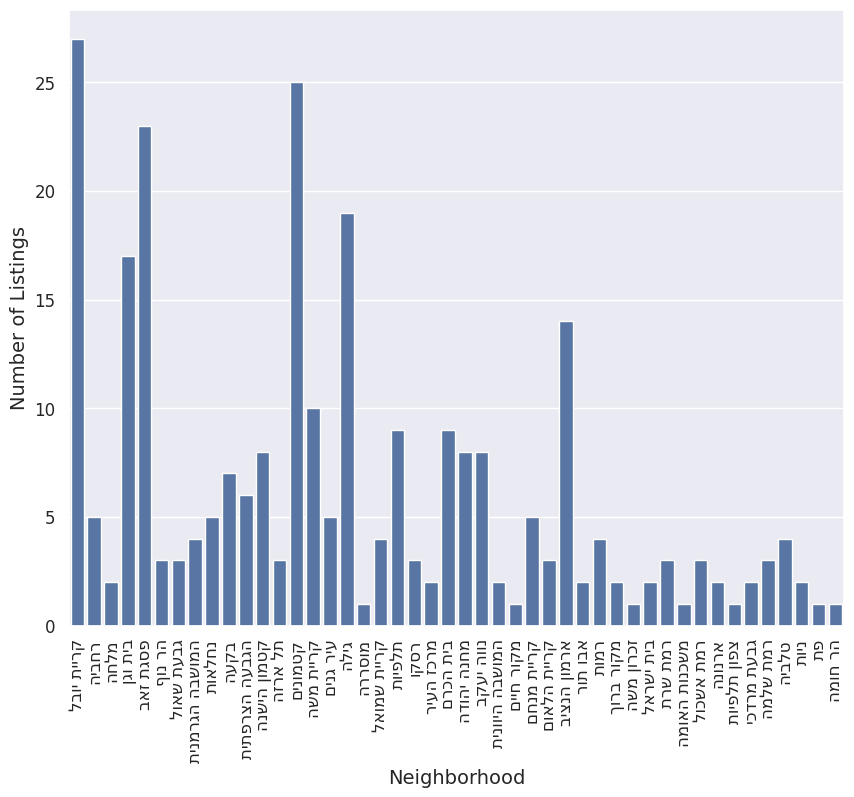

In [36]:
# Part 3 - Question 2
#ploting number of listing per neighborhood in part3_df,using count and the coloumn 'neighborhood_flipped'
plt.figure(figsize=(10,8))
sns.countplot(x='neighborhood_flipped', data=part3_df)
plt.xlabel("Neighborhood")
#changing the x axis ticks to be more readable
plt.xticks(rotation=90)
plt.ylabel("Number of Listings")
plt.show()

#
#



###**Question 3** - Heavy-tailed distributions
Print the fraction of listings that are from neighborhoods with less than 5 listings out of the whole dataset, and the fraction of listings from the 8 most frequent neighborhoods.

In [38]:
# Part 3 - Question 3
# Your code goes here:
#print the fraction of listing that are from neighborhoods with less than 5 listings
print('fraction of listing that are from neighborhoods with less than 5 listings:',)
#print( part3_df['neighborhood'].value_counts()[part3_df['neighborhood'].value_counts() < 5].sum())
print(part3_df['neighborhood'].value_counts()[part3_df['neighborhood'].value_counts() < 5].sum() / len(part3_df['neighborhood']))
#print fraction of listinf from the 8 most frequent neighborhoods
print('fraction of listinf from the 8 most frequent neighborhoods:',)
print(part3_df['neighborhood'].value_counts().head(8).sum()/len(part3_df['neighborhood']))



fraction of listing that are from neighborhoods with less than 5 listings:
0.23636363636363636
fraction of listinf from the 8 most frequent neighborhoods:
0.5236363636363637


Those types of distributions where there are many categories that appear only a few times but together take a large portion of the distribution are called heavy-tailed (or long-tailed) distributions. This is a real issue in many data science applications, since even if we have a large dataset there are still some sub-populations or sub-categories that are not well represented.

###**Question 4**
Create a new filtered dataframe with only listings from the 8 most frequent neighborhoods.

In [ ]:
# Part 3 - Question 4
# Your code goes here:
#a new filtered dataframe with only listings from the 8 most frequent neighborhoods.
part3_df2 = part3_df[part3_df['neighborhood'].isin(part3_df['neighborhood'].value_counts().head(8).index)]
part3_df2.head(10)
#printing unique values
print(part3_df2['neighborhood'].unique())



['קריית יובל' 'בית וגן' 'פסגת זאב' 'קטמונים' 'קריית משה' 'גילה' 'בית הכרם'
 'ארמון הנציב']


###**Question 5**
Plot a graph to check whether there are different distributions of monthly rates in the eight neighborhoods. Explain your choice for the visualization and your conclusions.
Note: Make sure that the neighborhoods are ordered in the plot based on there tendency to higher or lower monthly rates.

<ipython-input-41-916a6f75dd88>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part3_df2['monthlyRate_mean'] = part3_df2.groupby('neighborhood')['monthlyRate'].transform('mean')


<Figure size 1000x800 with 0 Axes>

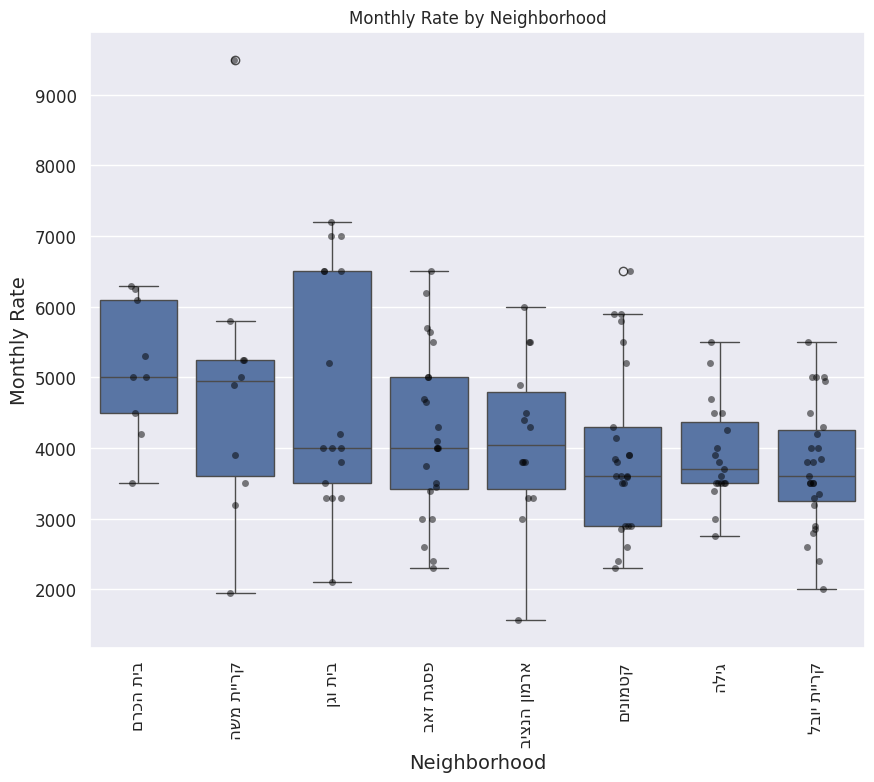

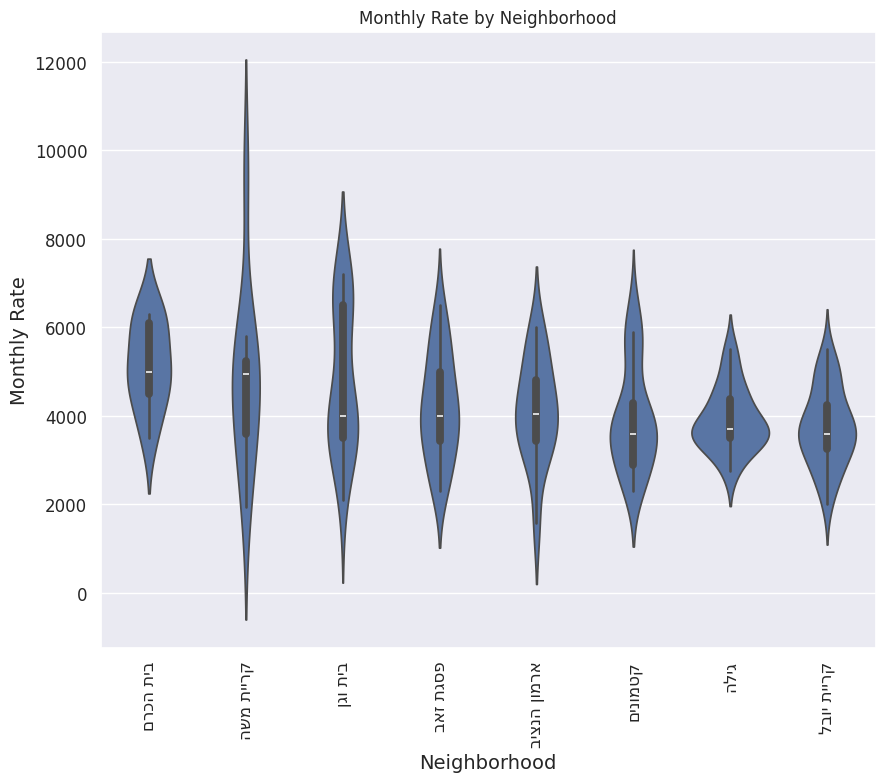

In [ ]:
# Part 3 - Question 5
# I tried 2 plots but i think the second one is better:
#plot graph check whether there are different distributions of monthly rates in the eight neighborhoods.
#the neighborhoodsshould be  ordered in the plot based on there tendency to higher or lower monthly rates.
plt.figure(figsize=(10,8))
#for each neighborhood, calculate the mean monthly rate and add as column
part3_df2['monthlyRate_mean'] = part3_df2.groupby('neighborhood')['monthlyRate'].transform('mean')
#sns.boxplot(x='neighborhood_flipped', y='monthlyRate', data=part3_df2)
#order te plots based on the mean monthly rate
part3_df2 = part3_df2.sort_values(by='monthlyRate_mean', ascending=False)
plt.figure(figsize=(10,8))
sns.boxplot(x='neighborhood_flipped', y='monthlyRate', data=part3_df2)
#add stripplot
sns.stripplot(x='neighborhood_flipped', y='monthlyRate', data=part3_df2, color='black',alpha=0.5)
plt.title('Monthly Rate by Neighborhood')
plt.ylabel('Monthly Rate')
plt.xlabel('Neighborhood')
#rotate the x-axis labels
plt.xticks(rotation=90)
plt.show()
#do the same with violin plots
plt.figure(figsize=(10,8))
sns.violinplot(x='neighborhood_flipped', y='monthlyRate', data=part3_df2)
plt.title('Monthly Rate by Neighborhood')
plt.ylabel('Monthly Rate')
plt.xlabel('Neighborhood')
#rotate the x-axis labels
plt.xticks(rotation=90)
plt.show()



---
#### Part 3 Question 5 - textual Answer:
*Write your answer here:*
even though we are using the same data for both models, the results are not the same.
both do tell us something about the distribution of the data.
gowever the second graph, the violin plot, tells us more.
it show us gives a better sense of the distribution shape compared to boxplots
also they allow for the visualization of the symmetry and skewness of the data distribution.
---
relating to the violin plots, we see that the "בית הכרם" has the highest mean but "קריית משה" has the largest variance in the date, because of outliers.
we cam also see that "בית וגן" and "קטמונים" are bimodal distributions.

### **Question 6**
Now that we compared the different distributions of monthly rates betwen neighborhoods, we can check whether we can explain some of the differences using common-sense and the data we already have.
For example, perhaps different neighborhoods have different distributions of apartment sizes?

Think of a new variable that will allow you to check association between neighborhoods and prices fairly, factoring different apartment sizes out of the equation. Save this measure into the dataframe and create a new visualization to answer the question...


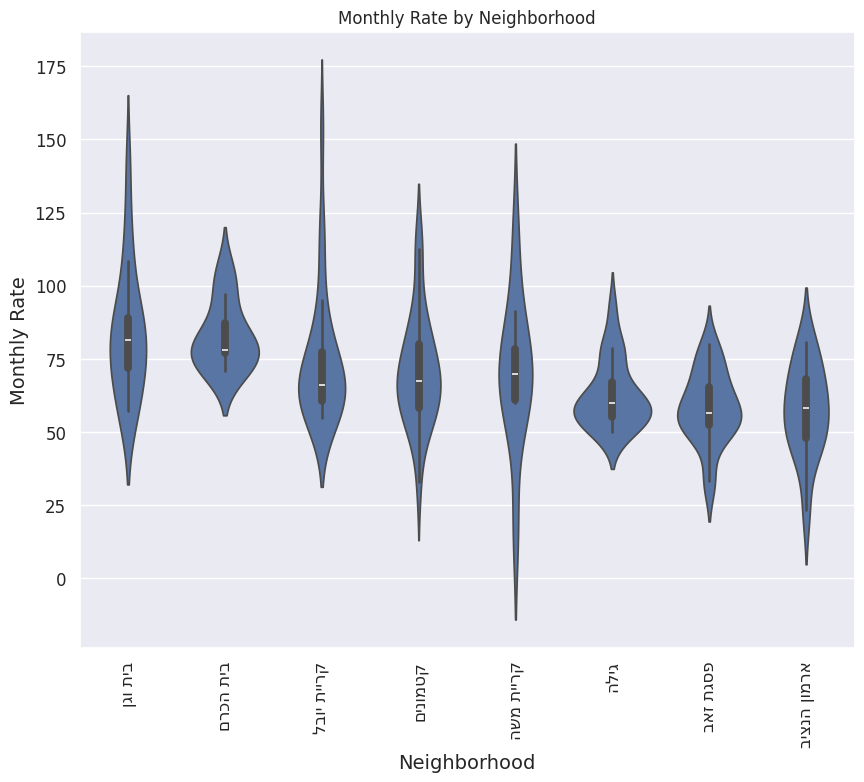

In [ ]:
# Part 3 - Question 6
# Your code goes here:
#create a new var to check association between neighborhood and monthly rate,factoring diffrent areas sizes out of the equation
#name is price_per_area
part3_df2['price_per_area'] = part3_df2['monthlyRate'] / part3_df2['area']
#add column to part3_df2 of  mean price_per_area per neighborhood
part3_df2['price_per_area_mean'] = part3_df2.groupby('neighborhood')['price_per_area'].transform('mean')
#sort part3_df2 by price_per_area
part3_df2 = part3_df2.sort_values(by='price_per_area_mean', ascending=False)
#now plot violin plot
plt.figure(figsize=(10,8))
sns.violinplot(x='neighborhood_flipped', y='price_per_area', data=part3_df2)
plt.title('Monthly Rate by Neighborhood')
plt.ylabel('Monthly Rate')
plt.xlabel('Neighborhood')
#rotate the x-axis labels
plt.xticks(rotation=90)
plt.show()

#
#



---
#### Part 3 Question 6 - textual Answer:
we got a bit diffrent conclusions. even though "בית הכרם " and "בית וגן" are in the top 3 of means ,there was a major change, where "קריית יובל" entered the top 3 (where last time they were last), it can be explained bacuase o of smoe outliers in that neighborhood. also there arent as bimodlation as before.

---

Given the conclusions from the previous steps, we may think that the apartment's neighborhood gives us additional information about the expected monthly rate. But the sample size for most neighborhoods is rather small. So let's examine another way to utilize the location information. Luckily, we also have data about the socio-economic rank of most neighborhoods (between 1 and 10).

### Question 7 - **bonus**
Use again the full dataset (without filtering by neighborhood).

Create an aggregated dataframe where every record represents a neighborhood, with columns for:
1. neighborhood name
2. flipped neighborhood name
3. The number of listings in a neighborhood
4. The median monthly rate for listings in this neighborhood.

Add a column with the neighborhood socio-economic rank to the dataframe (you can use the provided `get_neighborhood_rank` function that takes as an input a neighborhood name and returns its socio-economic rank.) Use this dataframe to visualize the association between socio-economic rank and pricing for all neighborhoods with at least 5 listings. What is you conclusion?

In [ ]:
# Part 3 - Question 7
# Your code goes here:
#
#



---
#### Part 3 Question 7 - textual Answer:
*Write your answer here:*

---

## Part 4: Are private houses more expensive than apartments?

In [ ]:
# @title Part 4 - Create DataFrame
part4_df = rent_df_backup_for_exercise.copy()
part4_df = part4_df[part4_df['monthlyRate'] > 0].reset_index(drop=True);
part4_df = part4_df[part4_df['area'] < 800].reset_index(drop=True)
part4_df = part4_df[part4_df['area'] > 10].reset_index(drop=True)

Finally, we want to check if listings in private houses tend to be more expensive than apartments in a building.

**Use only `part4_df` for the coding questions in this part**

### **Question 1**
The current dataset doesn't include a variable that describes whether a listing is in a building or a private house but this can be inferred from the existing variables. Create a new column named "is_a_house" with value of `True` if a listing is in the first (or zero) floor in a building with only one floor. Print the number of houses according to this criteria and print the descriptions of three random listings with 'is_a_house' equal to `True`.

In [ ]:
# Part 4 - Question 1
# Your code goes here:
# Create a new column named "is_a_house" with value of `True` if a listing is in the first (or zero) floor in a building with only one floor.
# Otherwise, set it to `False`.
part4_df['is_a_house'] = ((part4_df['floor'] == 0) | ((part4_df['floor'] == 1) & (part4_df['numFloors'] == 1)))
part4_df.head(10)
#print num of row where is_a_house is True
print(len(part4_df[part4_df['is_a_house'] == True]))
#print 3 num random des where is_a_house is True
print(part4_df['description'][part4_df['is_a_house'] == True].sample(3))
#
#



56
15                           להשכרה, דירת חדר , בירושלים
210    דירת גן עם מירפסת וגינה גדולים. 3.5 חדרים . 5 ...
273                                                  NaN
Name: description, dtype: object


### **Question 2**
Create a visualization that compares the **average** monthly rates in houses vs. apartments. Which are more expensive on average?

the average monthly rate of listings in the houses is: 3962.5
the average monthly rate of listings in the flats is: 4949.931506849315


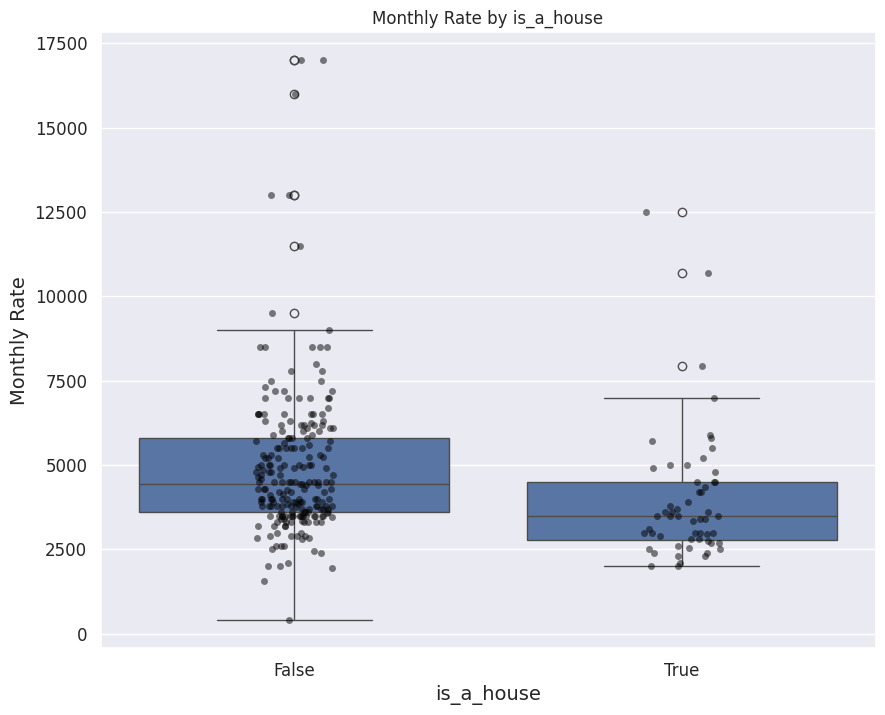

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   propertyID     275 non-null    int64  
 1   neighborhood   275 non-null    object 
 2   monthlyRate    275 non-null    float64
 3   mefarsem       275 non-null    object 
 4   rooms          275 non-null    float64
 5   floor          275 non-null    float64
 6   area           275 non-null    float64
 7   entry          272 non-null    object 
 8   description    266 non-null    object 
 9   numFloors      275 non-null    float64
 10  lastUpdate     275 non-null    float64
 11  dateCollected  275 non-null    object 
 12  is_a_house     275 non-null    bool   
dtypes: bool(1), float64(6), int64(1), object(5)
memory usage: 26.2+ KB


In [ ]:
# Part 4 - Question 2
# Your code goes here:
#comapre the average monthly rate of listings in the houses and the average monthly rate of listings in the flats
a=part4_df[part4_df['is_a_house'] == True]['monthlyRate'].mean()
b=part4_df[part4_df['is_a_house'] == False]['monthlyRate'].mean()
print('the average monthly rate of listings in the houses is:',a)
print('the average monthly rate of listings in the flats is:',b)
#visualise comparision
plt.figure(figsize=(10,8))
sns.boxplot(x='is_a_house', y='monthlyRate', data=part4_df)
sns.stripplot(x='is_a_house', y='monthlyRate', data=part4_df, color='black',alpha=0.5)
plt.title('Monthly Rate by is_a_house')
plt.ylabel('Monthly Rate')
plt.xlabel('is_a_house')
plt.show()
#
#
part4_df.info()


---
#### Part 4 Question 2 - textual Answer:
*Write your answer here:*
flats are nore more expensive than houses on average
---

###**Question 3**  
Now, let's look on the data in a higher resolution. Create a visualization that compares the average monthly rates of houses vs. apartments separetly for any number of rooms. Do the results align with the results from the previous question?


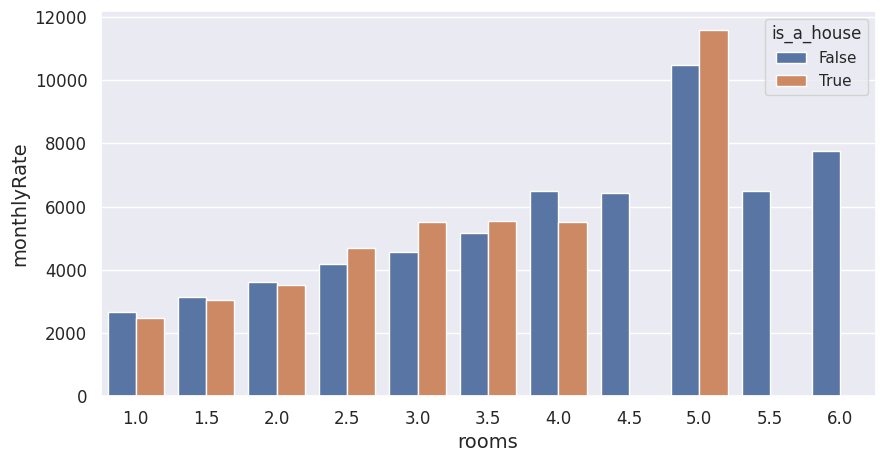

3


<Axes: xlabel='rooms', ylabel='count'>

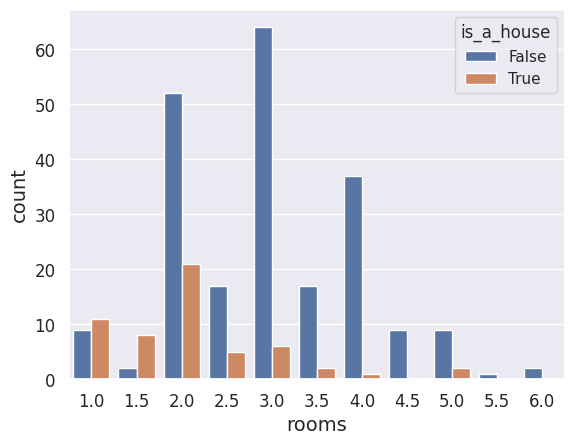

In [ ]:
# Part 4 - Question 3
# Your code goes here:
#for every num of rooms,compare the average monthly rate of listings in the houses and the average monthly rate of listings in the flats
#group by num of rooms and is_a_house
part4_df.groupby(['rooms','is_a_house'])['monthlyRate'].mean()
#return as dataframe
alci=part4_df.groupby(['rooms','is_a_house'])['monthlyRate'].mean().to_frame()
#create a plot alci so for every number of rooms there wiill be 2 barplots in diffrent colors
plt.figure(figsize=(10,5))
sns.barplot(x='rooms',y='monthlyRate',hue='is_a_house',data=alci)
plt.show()

#print how many rows in the dataframe has rooms>5
print(len(part4_df[part4_df['rooms']>5]))
sns.countplot(x='rooms', hue='is_a_house', data=part4_df)


#



---
#### Part 4 Question 3 - textual Answer:
*Write your answer here:*
houses are more expensice for 2.5 to 3.5 rooms and in the case of 5 rooms. everything else, flats are more expensive.
---

### **Question 4**
Dan saw those visualizations and suggested that the trend in **question 2** is due to the fact that apartments in this dataset have larger maximal number of rooms than houses.

Create a new visualization similar to **question 2**, but consider only apartment listings with a number of rooms less or equal to the maximal number of rooms for a private house listing. Does the result now align with the trend in **question 3**? If not, is the discrapancy smaller than before?

<class 'pandas.core.frame.DataFrame'>
Index: 272 entries, 0 to 274
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   propertyID     272 non-null    int64  
 1   neighborhood   272 non-null    object 
 2   monthlyRate    272 non-null    float64
 3   mefarsem       272 non-null    object 
 4   rooms          272 non-null    float64
 5   floor          272 non-null    float64
 6   area           272 non-null    float64
 7   entry          269 non-null    object 
 8   description    263 non-null    object 
 9   numFloors      272 non-null    float64
 10  lastUpdate     272 non-null    float64
 11  dateCollected  272 non-null    object 
 12  is_a_house     272 non-null    bool   
dtypes: bool(1), float64(6), int64(1), object(5)
memory usage: 27.9+ KB


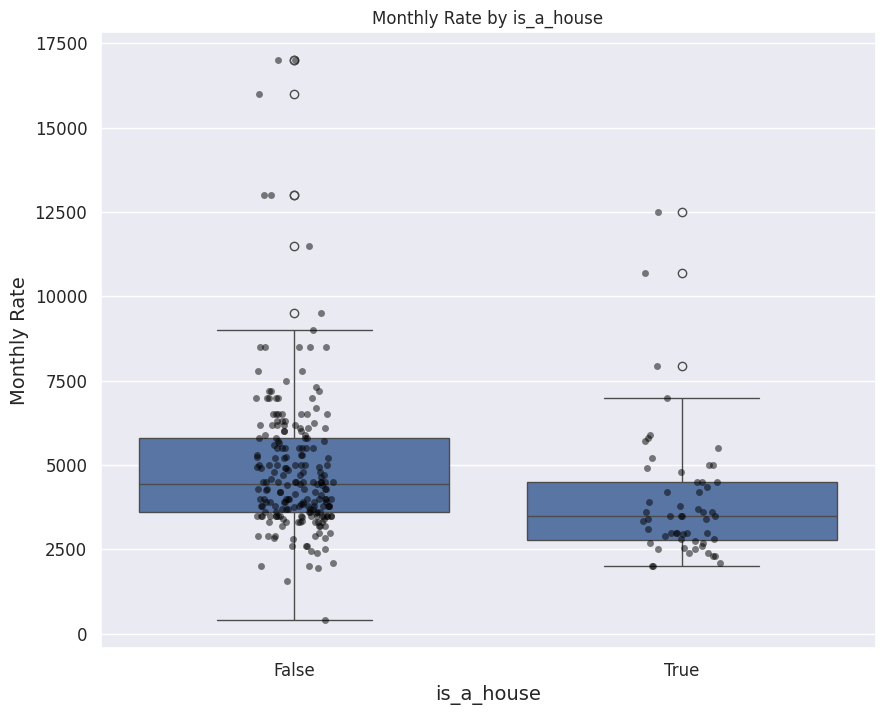

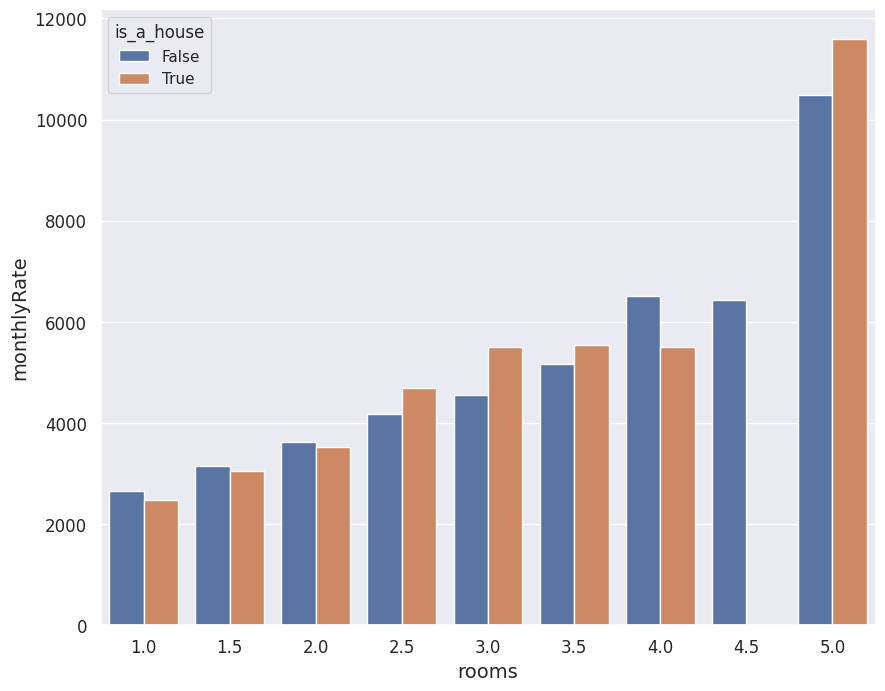

In [ ]:
# Part 4 - Question 4
# Your code goes here:
albi=part4_df[part4_df['rooms']<=part4_df['rooms'][part4_df['is_a_house'] == True].max()]
albi.info()
#visualise
plt.figure(figsize=(10,8))
sns.boxplot(x='is_a_house', y='monthlyRate', data=albi)
sns.stripplot(x='is_a_house', y='monthlyRate', data=albi, color='black',alpha=0.5)
plt.title('Monthly Rate by is_a_house')
plt.ylabel('Monthly Rate')
plt.xlabel('is_a_house')
plt.show()
aldi=albi.groupby(['rooms','is_a_house'])['monthlyRate'].mean().to_frame()
plt.figure(figsize=(10,8))
sns.barplot(x='rooms',y='monthlyRate',hue='is_a_house',data=aldi)
plt.show()
#
#



---
#### Part 4 Question 4 - textual Answer:
*Write your answer here:*
it didnt change almost anything
the maximal num of roooms in private house is 5
there are only 3 apartments where the num of rooms exceed that.
so it didnt change drasticall(apperantly they wernt outliers in the price aspect)
also we stlii has flats with 4.5 rooms(and a lot) while we dont have any private houses with that num of rooms
---

###**Question 5**
Create a visualization that compares the proportion of listings with every value of "number of rooms" in each of the two groups (is_a_house == True and is_a_house == False). How can the results here explain the discrapancy between the **question 2** result and the **question 3** result? (Hint: recall the UC Berkeley admission rates example from the first lecture)

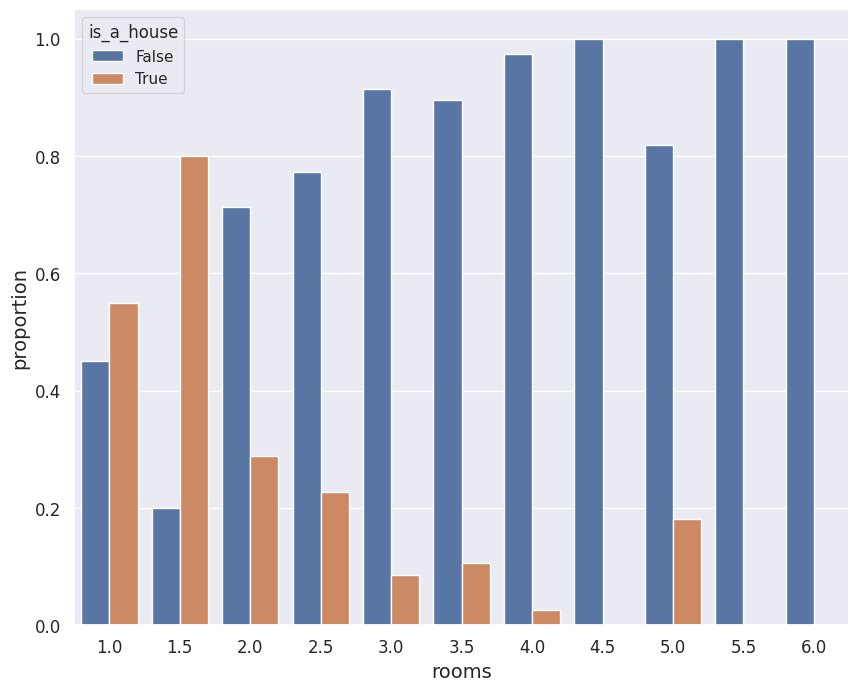

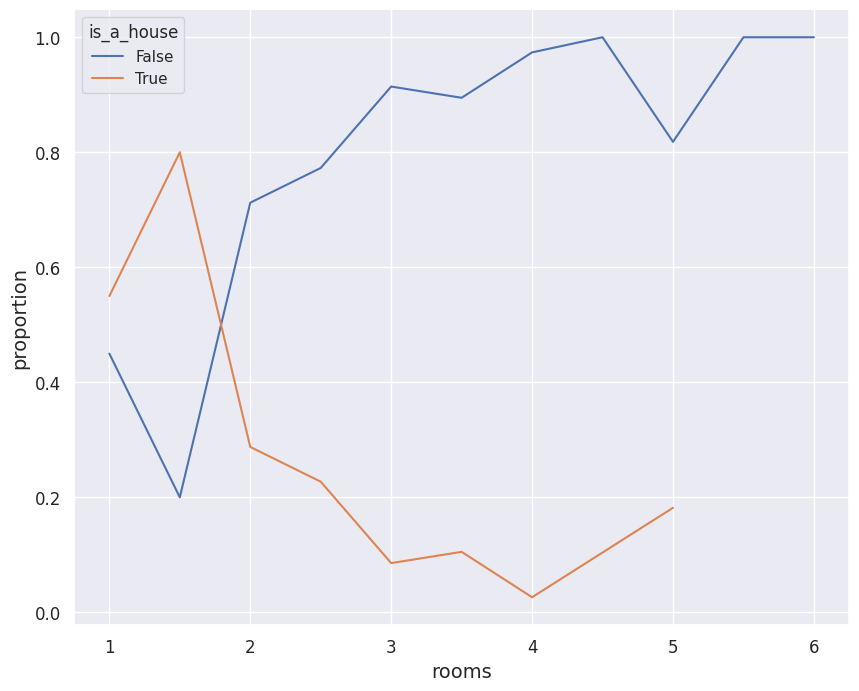

In [ ]:
# Part 4 - Question 5
# Your code goes here:
#visualization that compares the proportion of listings with every value of "number of rooms" in each of the two groups (is_a_house == True and is_a_house == False).
#group by rooms and is_a_house
#count the number of rows in each group

algi=part4_df.groupby(['rooms','is_a_house'])['propertyID'].count().to_frame()
#add a proportion column
#each one is the count of that row dicided by the sum  count for the same num of rooms
algi['proportion'] = algi['propertyID'] / algi.groupby('rooms')['propertyID'].transform('sum')
plt.figure(figsize=(10,8))
sns.barplot(x='rooms',y='proportion',hue='is_a_house',data=algi)
plt.show()
#plot graphs with 2 lines, one for each is_a_house where the x axis is the number of rooms and the y axis is the proportion
plt.figure(figsize=(10,8))
sns.lineplot(x='rooms',y='proportion',hue='is_a_house',data=algi)
plt.show()
#
#



---
#### Part 4 Question 5 - textual Answer:
*Write your answer here:*
there are many more flats than private houses. so even if in some groups(divivded by rooms) , we see that the average price of flats is lower than houses,the ratio of houses are actually in the groups where their mean is lower than flats and generally, with much lower prices
and on the contrary, the ratio of flats is monotonically increasing as the number of rooms increase.  
---(last graph)